<a href="https://colab.research.google.com/github/Davjot/GNN/blob/main/GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW TO IMPLEMENT A GRAPH

In [1]:
import networkx as nx

In [2]:
H = nx.DiGraph()

In [3]:
H.add_nodes_from([
    (0, {'color' : 'gray', 'size' : 450}),
    (1, {'color' : 'yellow', 'size' : 700}),
    (2, {'color' : 'red', 'size' : 250}),
    (3, {'color' : 'pink', 'size' : 500}),
])

In [5]:
for node in H.nodes(data = True):
  print(node)

(0, {'color': 'gray', 'size': 450})
(1, {'color': 'yellow', 'size': 700})
(2, {'color': 'red', 'size': 250})
(3, {'color': 'pink', 'size': 500})


In [6]:
H.add_edges_from([
    (0,1),
    (1,2),
    (2,0),
    (2,3),
    (3,2)
])

In [7]:
print(H.edges())

[(0, 1), (1, 2), (2, 0), (2, 3), (3, 2)]


In [8]:
def print_graph_info(graph):
  print('Directed graph : ', graph.is_directed())
  print('Number of nodes : ', graph.number_of_nodes())
  print('Number of edges : ', graph.number_of_edges())

In [10]:
print_graph_info(H)

Directed graph :  True
Number of nodes :  4
Number of edges :  5


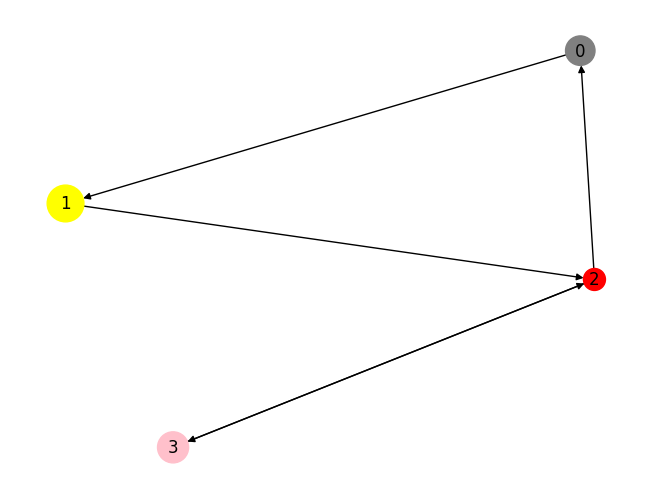

In [12]:
node_colors = nx.get_node_attributes(H, 'color').values()
colors = list(node_colors)

node_sizes = nx.get_node_attributes(H, 'size').values()
sizes = list(node_sizes)

nx.draw(H, with_labels = True, node_color = colors, node_size = sizes)

In [13]:
G = H.to_undirected()
print_graph_info(G)

Directed graph :  False
Number of nodes :  4
Number of edges :  4


In [14]:
print(G.edges())

[(0, 1), (0, 2), (1, 2), (2, 3)]


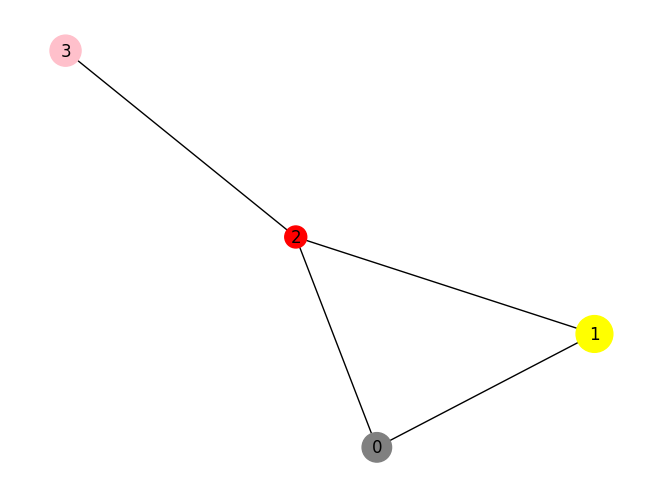

In [15]:
nx.draw(G, with_labels = True, node_color = colors, node_size = sizes)

# IMPLEMENT GNN ON KARATE CLUB DATASET

In [17]:
!pip install torch_geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910459 sha256=e4a8db4c31f923376c082d7e9b890d8ffc9692e6fcc2bf7096d17d97fb6b12af
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch_geometric


In [45]:
#install required packages
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)
#ensure that the PyTorch and the PyG are the same version
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 9.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [46]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

In [47]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

In [48]:
print('Dataset properties')
print('==============================================================')
print(f'Dataset: {dataset}') #This prints the name of the dataset
print(f'Number of graphs in the dataset: {len(dataset)}')
print(f'Number of features: {dataset.num_features}') #Number of features each node in the dataset has
print(f'Number of classes: {dataset.num_classes}') #Number of classes that a node can be classified into


#Since we have one graph in the dataset, we will select the graph and explore it's properties

data = dataset[0]
print('Graph properties')
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}') #Number of nodes in the graph
print(f'Number of edges: {data.num_edges}') #Number of edges in the graph
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}') # Average number of nodes in the graph
print(f'Contains isolated nodes: {data.has_isolated_nodes()}') #Does the graph contains nodes that are not connected
print(f'Contains self-loops: {data.has_self_loops()}') #Does the graph contains nodes that are linked to themselves
print(f'Is undirected: {data.is_undirected()}') #Is the graph an undirected graph

Dataset properties
Dataset: KarateClub()
Number of graphs in the dataset: 1
Number of features: 34
Number of classes: 4
Graph properties
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


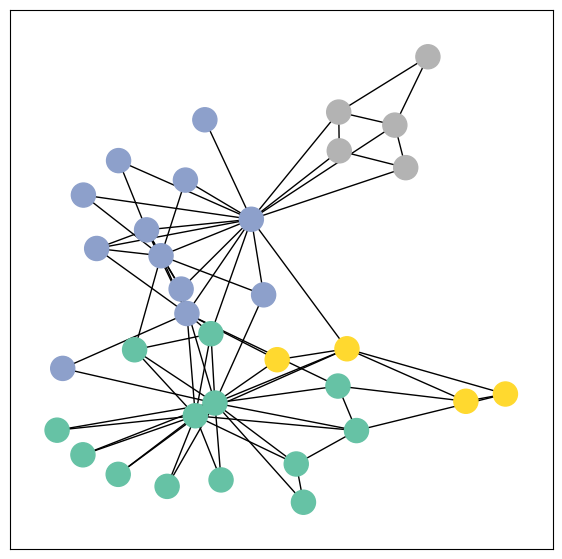

In [49]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [50]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.

        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [51]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()  #Initialize the CrossEntropyLoss function.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Initialize the Adam optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    print(f'Epoch: {epoch}, Loss: {loss}')

Epoch: 0, Loss: 1.414404273033142
Epoch: 1, Loss: 1.4079036712646484
Epoch: 2, Loss: 1.4017865657806396
Epoch: 3, Loss: 1.3959276676177979
Epoch: 4, Loss: 1.3902204036712646
Epoch: 5, Loss: 1.3845514059066772
Epoch: 6, Loss: 1.3788156509399414
Epoch: 7, Loss: 1.372924566268921
Epoch: 8, Loss: 1.3668041229248047
Epoch: 9, Loss: 1.3603920936584473
Epoch: 10, Loss: 1.3536320924758911
Epoch: 11, Loss: 1.346463680267334
Epoch: 12, Loss: 1.3388220071792603
Epoch: 13, Loss: 1.3306517601013184
Epoch: 14, Loss: 1.321907877922058
Epoch: 15, Loss: 1.3125460147857666
Epoch: 16, Loss: 1.3025131225585938
Epoch: 17, Loss: 1.2917399406433105
Epoch: 18, Loss: 1.2801498174667358
Epoch: 19, Loss: 1.267681360244751
Epoch: 20, Loss: 1.2542929649353027
Epoch: 21, Loss: 1.2399559020996094
Epoch: 22, Loss: 1.2246456146240234
Epoch: 23, Loss: 1.208348035812378
Epoch: 24, Loss: 1.1910830736160278
Epoch: 25, Loss: 1.172907829284668
Epoch: 26, Loss: 1.1538856029510498
Epoch: 27, Loss: 1.1340937614440918
Epoch: 28